# **Black Friday Sale Predictions**


*Reference:*
*   https://www.kaggle.com/code/cerolacia/blackfridaysalesprediction/notebook (For Data Preparation)



## Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FOLDER_PATH = r'/content/drive/MyDrive/MachineLearning-DANDL-20212/'
TRAIN_DATA_PATH = FOLDER_PATH + r'data/train.csv'
TEST_DATA_PATH = FOLDER_PATH + r'data/test.csv'

### Sanity Check

In [ ]:
import os
os.listdir(FOLDER_PATH)

['README.txt', 'src', 'data']

In [ ]:
os.path.exists(FOLDER_PATH), os.path.exists(TRAIN_DATA_PATH), os.path.exists(TEST_DATA_PATH)

(True, True, True)

### Magic Functions

In [ ]:
%matplotlib inline

## Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
from scipy import stats
from scipy.stats import norm

## Data Preprocessing

### Raw Data

In [ ]:
train_raw = pd.read_csv(TRAIN_DATA_PATH)
test_raw = pd.read_csv(TEST_DATA_PATH)

### QD's Simple EDA

In [ ]:
## Copy from raw train and raw test
df_train = train_raw.copy()
df_test = test_raw.copy()

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [ ]:
df_train_clean = df_train[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
# df_train_clean = df_train_clean.astype({"User_ID": object})
df_train_clean.info()
# df_train_clean = pd.get_dummies(df_train_clean)
df_test_clean = df_test[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
# df_test_clean = pd.get_dummies(df_test_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 33.6+ MB


In [ ]:
df_test_clean.shape
df_train_clean.shape

(550068, 8)

In [ ]:
check_point = df_train.shape[0]
check_point

550068

In [ ]:
Y_train = df_train['Purchase']
Y_train.shape

(550068,)

In [ ]:
df = pd.concat([df_train_clean, df_test_clean])

In [ ]:
arr = pd.factorize(df['Product_ID'])[0] + 1

In [ ]:
df['Product_ID'] = arr

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     783667 non-null  int64 
 1   Product_ID                  783667 non-null  int64 
 2   Gender                      783667 non-null  object
 3   Age                         783667 non-null  object
 4   Occupation                  783667 non-null  int64 
 5   City_Category               783667 non-null  object
 6   Stay_In_Current_City_Years  783667 non-null  object
 7   Marital_Status              783667 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 53.8+ MB


In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Age', 'Occupation' , 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status'])

In [ ]:
df.shape

(783667, 42)

In [ ]:
X_train = df.iloc[:check_point, :]
X_test = df.iloc[check_point:, :]

In [ ]:
X_train.shape

(550068, 42)

In [ ]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state =0)

In [ ]:
X_train_1.shape, X_val.shape

((385047, 42), (165021, 42))

### [1] EDA

In [ ]:
df_train = train_raw.copy()
df_test = test_raw.copy()

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
m = df_train["Gender"].value_counts()
m

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
age = df_train["Age"].value_counts()
age

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
age.index

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

In [ ]:
## WHY WE NEED TO DO THAT WHEN WE HAVE THE ABOVE?

fig = px.bar(age, y=age, x=age.index, color =age.index, template='ggplot2')
fig.update_layout(
    xaxis_title= 'Age',
    yaxis_title="Count",
    legend_title='Age',
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

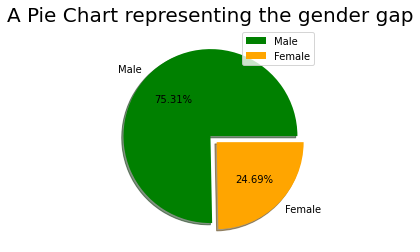

In [ ]:
## WHY WE NEED TO DO THAT ?

labels = ['Male', 'Female']
colors = ['Green', 'Orange']
explode = [0, 0.1]

plt.pie(m, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()



In [ ]:
## Nominal Data, why do we need to care about mean ??????????

df_train[['Product_Category_1', 'Product_Category_2','Product_Category_3']].groupby(df_train['Gender']).mean()

,Product_Category_1,Product_Category_2,Product_Category_3
Gender,,,
F,5.717714,10.009166,12.453556
M,5.301512,9.788729,12.730699


In [ ]:
## Why
df_train[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].groupby(df_train['User_ID']).count()

,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,,,
1000001,35,21,14
1000002,77,54,26
1000003,29,23,13
1000004,14,12,9
1000005,106,58,16
...,...,...,...
1006036,514,319,110
1006037,122,74,33
1006038,12,9,3


In [ ]:
## Who by the most product
df_train['Product_ID'].groupby(df_train['User_ID']).count().sort_values(ascending = False)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: Product_ID, Length: 5891, dtype: int64

In [ ]:
## TOP 5 PRODUCT
df_train['Product_ID'].value_counts()[:5]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64

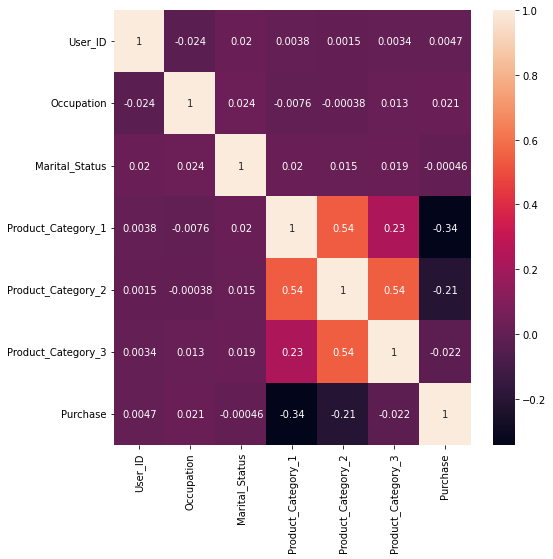

In [ ]:
## What do we figure out ?
fig, ax = plt.subplots(figsize= (8, 8))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

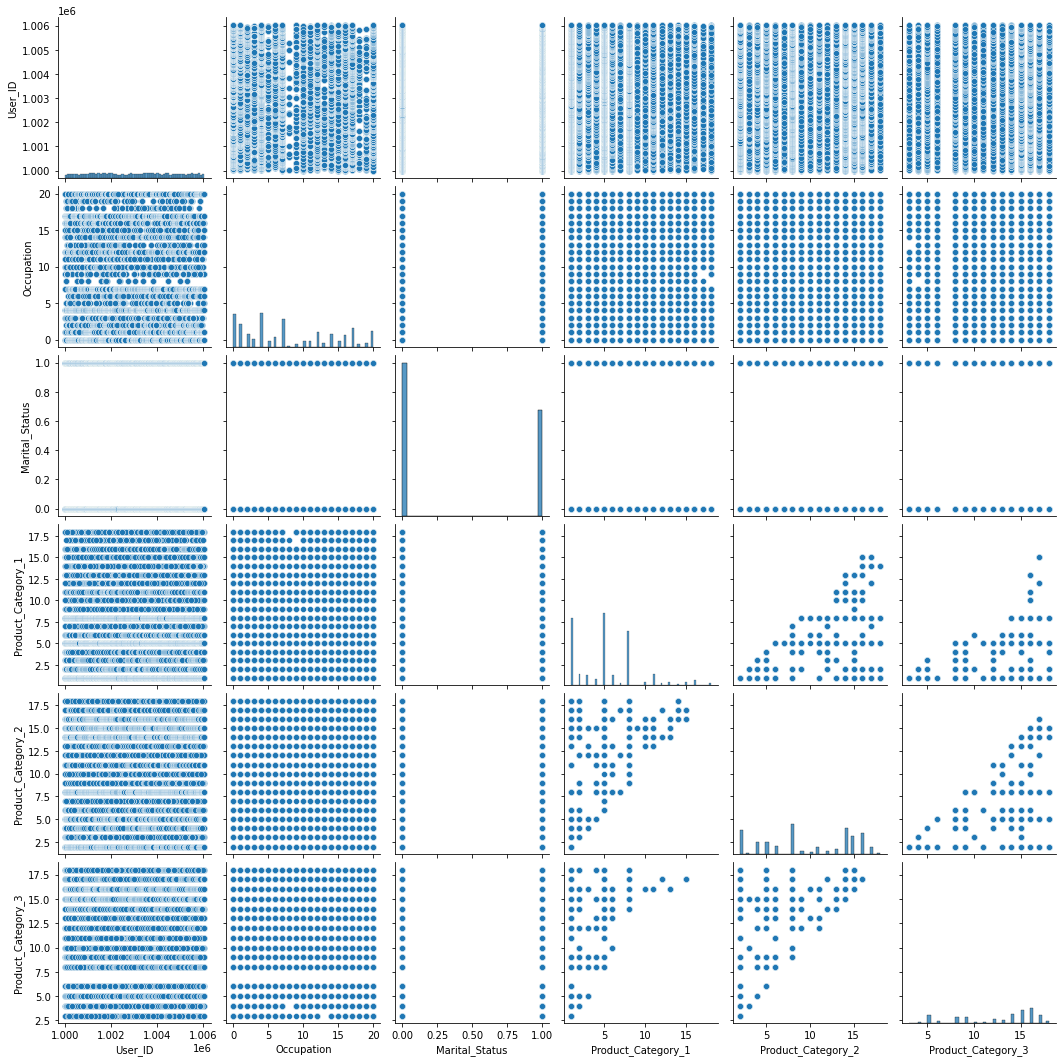

In [ ]:
sns.pairplot(df_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


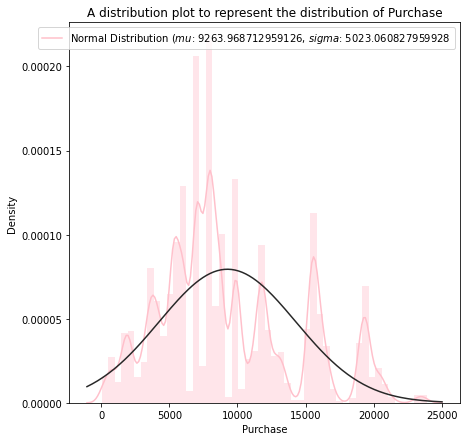

In [ ]:
## Distribution of the target attribute
plt.rcParams['figure.figsize'] = (7,7)
sns.distplot(df_train['Purchase'], color = 'pink', fit = norm)
mu, sigma = norm.fit(df_train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))
plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

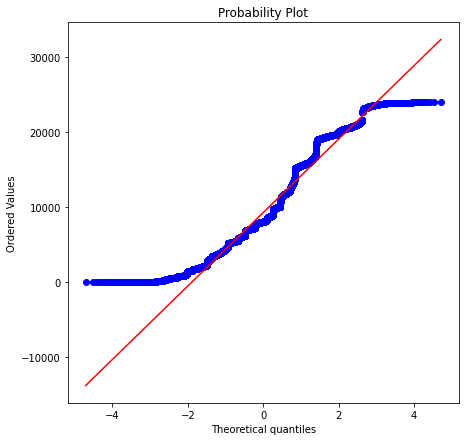

In [ ]:
## Normal check 
stats.probplot(df_train['Purchase'], plot = plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



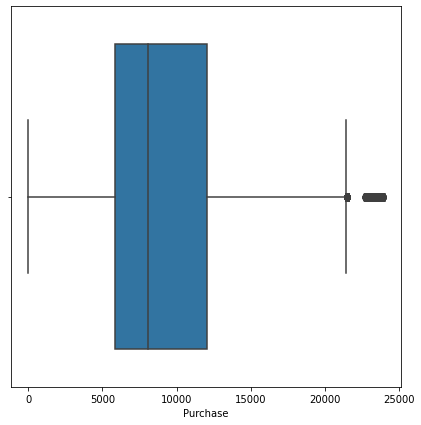

In [ ]:
sns.boxplot(df_train['Purchase'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



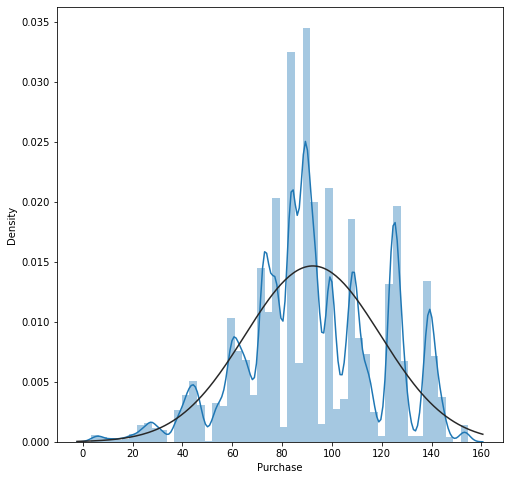

In [ ]:
ax, fig = plt.subplots(figsize = (8, 8))
sns.distplot(np.sqrt(df_train['Purchase']), fit = norm)

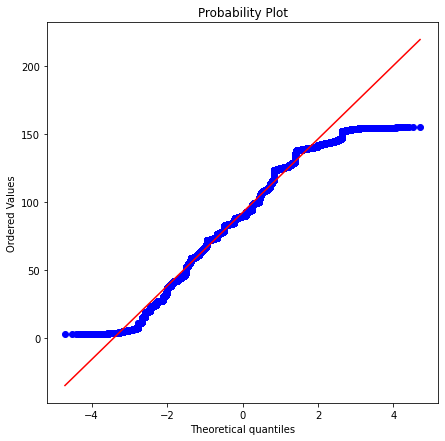

In [ ]:
stats.probplot(np.sqrt(df_train['Purchase']), plot = plt)
plt.show()

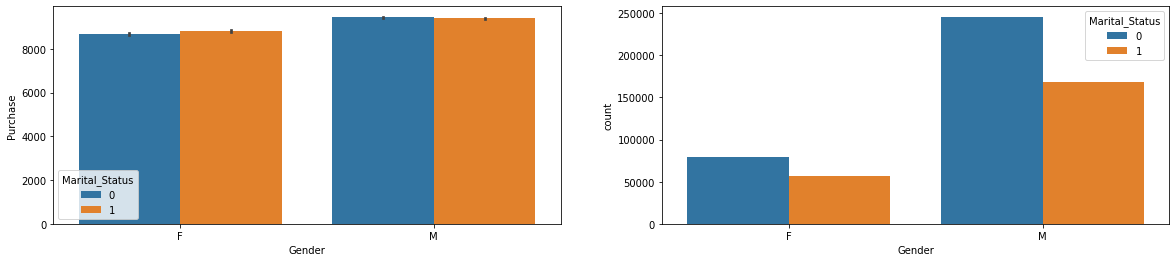

In [ ]:
## Dependency
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=df_train,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status",data=df_train,ax=ax[1])

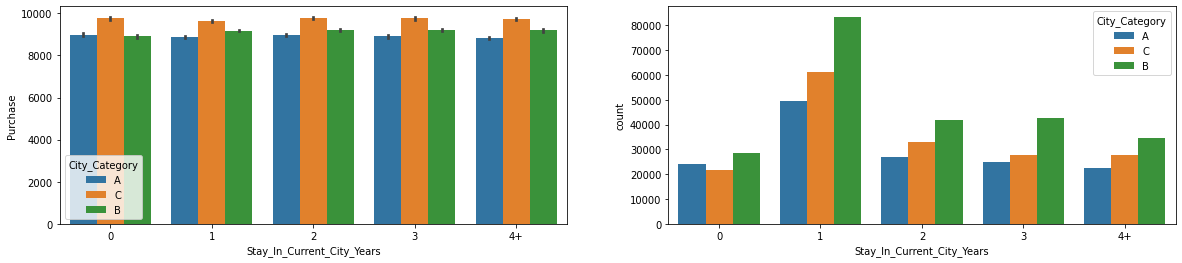

In [ ]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",order=["0","1","2","3","4+"],estimator=np.mean,data=df_train,ax=ax[0])
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",order=["0","1","2","3","4+"],data=df_train,ax=ax[1])


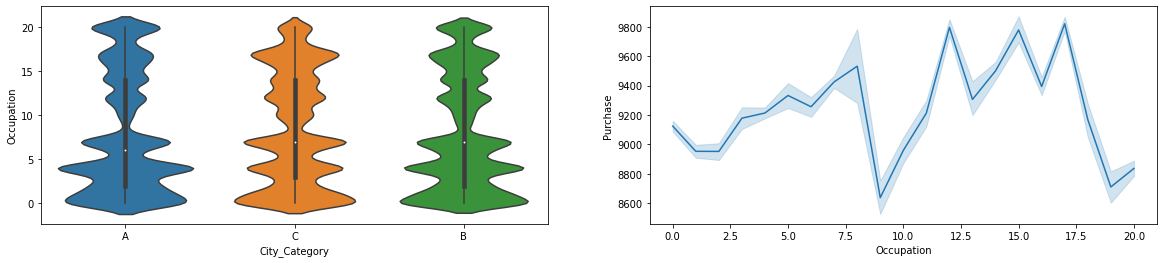

In [ ]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="City_Category",y="Occupation",data=df_train,ax=ax[0])
sns.lineplot(x="Occupation",y="Purchase",data=df_train,ax=ax[1])

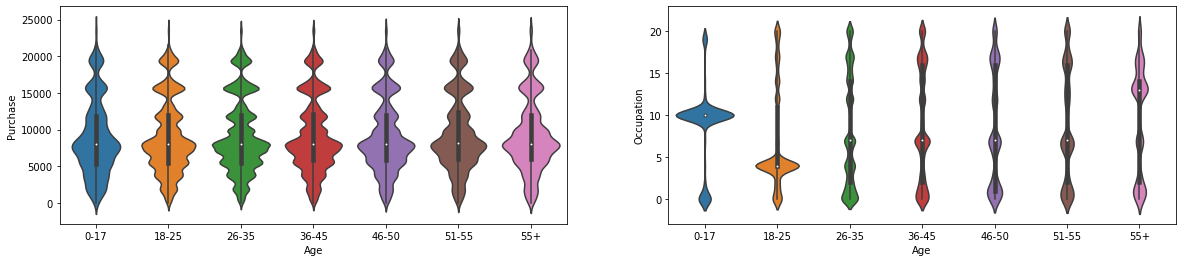

In [ ]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="Age",y="Purchase",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=df_train,ax=ax[0])
sns.violinplot(x="Age",y="Occupation",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=df_train,ax=ax[1])


#### Filling Missing Value

In [ ]:
## Why mean ?
## Fill Product_Category_2 in 2
df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mean(), inplace=True)

In [ ]:
df_train['Product_Category_2'].isnull().sum()

0

In [ ]:
df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean(), inplace=True)

In [ ]:
df_test['Product_Category_2'].isnull().sum()

0

In [ ]:
df_train['Product_Category_3'].fillna(df_train['Product_Category_3'].mode()[0], inplace= True)

In [ ]:
df_test['Product_Category_3'].fillna(df_test['Product_Category_3'].mode()[0],inplace=True)

In [ ]:
## Why fill sqrt with Category 1 
df_train['Product_Category_1']=np.sqrt(df_train['Product_Category_1'])

In [ ]:
df_test['Product_Category_1'] = np.sqrt(df_test['Product_Category_1'])

#### Encoder + Onehot Coding

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()

In [ ]:
df_train['Product_ID'].nunique()

3631

In [ ]:
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])

In [ ]:
le.classes_

array(['P00000142', 'P00000242', 'P00000342', ..., 'P0099742', 'P0099842',
       'P0099942'], dtype=object)

In [ ]:
columns = []
for col in df_train.columns:
  if df_train[col].dtypes == 'object':
      columns.append(col)

In [ ]:
columns

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [ ]:
train_encode = pd.get_dummies(df_train,columns = columns, dtype = np.uint8, drop_first=True)

In [ ]:
train_encode.shape

(550068, 21)

In [ ]:
train_encode.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,...,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,10,0,3,NaN,NaN,8370,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,2376,10,0,1,6.0,14.0,15200,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,852,10,0,12,NaN,NaN,1422,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,828,10,0,12,14.0,NaN,1057,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,2734,16,0,8,NaN,NaN,7969,1,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
test_encode = pd.get_dummies(df_test, columns = columns, dtype = np.uint8, drop_first = True)

In [ ]:
test_encode['Product_ID']

0         P00128942
1         P00113442
2         P00288442
3         P00145342
4         P00053842
            ...    
233594    P00118942
233595    P00254642
233596    P00031842
233597    P00124742
233598    P00316642
Name: Product_ID, Length: 233599, dtype: object

In [ ]:
test_encode['Product_ID'].nunique()

3491

In [ ]:
df_test['Product_ID'] = le.fit_transform(df_test['Product_ID'])

In [ ]:
le.classes_.shape

(3491,)

In [ ]:
test_encode['Product_ID'].nunique()

3491

In [ ]:
X = train_encode.drop(['Purchase'], axis= 1)
y = train_encode['Purchase']

#### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
col_train = X.columns
ind_train = X.index
col_test = test_encode.columns
ind_test = test_encode.index

In [ ]:
scl = StandardScaler()

In [ ]:
X = scl.fit_transform(X)
print(type(X))
X

<class 'numpy.ndarray'>


array([[-1.75263944, -1.02299262,  0.29486356, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [-1.75263944,  0.66046883,  0.29486356, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [-1.75263944, -0.84516218,  0.29486356, ...,  2.09795191,
        -0.45773082, -0.42669959],
       ...,
       [ 1.74066623,  1.83810149,  1.06142262, ..., -0.47665535,
        -0.45773082,  2.34356916],
       [ 1.74182391,  1.83810149, -1.08494277, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [ 1.74240275,  1.8361256 , -1.23825458, ..., -0.47665535,
        -0.45773082,  2.34356916]])

In [ ]:
X = pd.DataFrame(X, columns = col_train, index = ind_train)

In [ ]:
X.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.752639,-1.022993,0.294864,-0.833018,-0.494464,4.221533e-16,0.368792,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
1,-1.752639,0.660469,0.294864,-0.833018,-1.342931,-9.131340e-01,-0.361176,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
2,-1.752639,-0.845162,0.294864,-0.833018,1.513030,4.221533e-16,0.368792,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
3,-1.752639,-0.868873,0.294864,-0.833018,1.513030,9.880753e-01,0.368792,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
4,-1.752061,1.014154,1.214734,-0.833018,0.776266,4.221533e-16,0.368792,0.572570,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,4.957802,-0.851422,1.487778,-0.737607,-0.476655,-0.457731,2.343569


In [ ]:
test_encode = scl.fit_transform(test_encode)
test_encode

array([[-1.75230503, -0.50111372, -0.16644456, ...,  2.08785232,
        -0.45552667, -0.42644835],
       [-1.749409  , -0.6561492 ,  1.36703141, ..., -0.47896108,
        -0.45552667, -0.42644835],
       [-1.74882979,  1.07818104, -1.08653014, ..., -0.47896108,
        -0.45552667,  2.34494985],
       ...,
       [ 1.74146593, -1.37034598,  1.06033621, ..., -0.47896108,
        -0.45552667,  2.34494985],
       [ 1.74204513, -0.54142294, -1.08653014, ..., -0.47896108,
        -0.45552667,  2.34494985],
       [ 1.74320355,  1.33553994, -1.23987774, ..., -0.47896108,
        -0.45552667,  2.34494985]])

In [ ]:
test_encode.shape

(233599, 20)

In [ ]:
col_test.shape

(20,)

In [ ]:
ind_test.shape

(233599,)

In [ ]:
test_encode = pd.DataFrame(test_encode, columns = col_test, index= ind_test)

In [ ]:
test_encode.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.752305,-0.501114,-0.166445,1.199419,-1.352134,0.271766,0.369233,0.573575,-0.470186,-0.816412,-0.499941,3.306406,-0.273729,-0.201044,1.170460,-0.670906,-0.739638,2.087852,-0.455527,-0.426448
1,-1.749409,-0.656149,1.367031,-0.833737,-0.481941,-1.145633,0.369233,0.573575,-0.470186,1.224872,-0.499941,-0.302443,-0.273729,-0.201044,-0.854365,1.490522,-0.739638,-0.478961,-0.455527,-0.426448
2,-1.748830,1.078181,-1.086530,1.199419,0.117187,0.980466,0.369233,-1.743450,-0.470186,-0.816412,2.000235,-0.302443,-0.273729,-0.201044,1.170460,-0.670906,-0.739638,-0.478961,-0.455527,2.344950
3,-1.748830,-0.340910,-1.086530,1.199419,-0.163428,-0.200700,0.369233,-1.743450,-0.470186,-0.816412,2.000235,-0.302443,-0.273729,-0.201044,1.170460,-0.670906,-0.739638,-0.478961,-0.455527,2.344950
4,-1.748251,-1.147095,-1.086530,-0.833737,-0.163428,-1.145633,-1.089015,-1.743450,-0.470186,1.224872,-0.499941,-0.302443,-0.273729,-0.201044,-0.854365,1.490522,1.352013,-0.478961,-0.455527,-0.426448


### HDuc++ Version

#### Read from files

In [ ]:
import matplotlib.style as style
style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'monospace'

In [ ]:
train_df = pd.read_csv(TRAIN_DATA_PATH)
test_df = pd.read_csv(TEST_DATA_PATH)
train_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
train_df.rename(columns={"Stay_In_Current_City_Years":"Years_in_city"}, inplace= True)
test_df.rename(columns={"Stay_In_Current_City_Years":"Years_in_city"}, inplace = True)
train_df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


#### Preprocessing & Visualization

##### Basic Understanding

In [ ]:
print("shape of data:", train_df.shape )
print("number of unique user: ", train_df['User_ID'].nunique())
print("number of unique products: ", train_df['Product_ID'].nunique())

shape of data: (550068, 12)
number of unique user:  5891
number of unique products:  3631


In [ ]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Years_in_city', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

##### Processing duplicates

Ideas: grouping `User_ID` with `total_purchase`

In [ ]:
duplicated = train_df[train_df.duplicated()]
print("number of duplicated:", duplicated.shape[0])

number of duplicated: 0


In [ ]:
user_df = train_df[["User_ID", "Gender", "Age", "Occupation", "City_Category", "Years_in_city", "Marital_Status"]]
user_duplicated = user_df[user_df.duplicated()]
print("number of duplicated user:", user_duplicated.shape[0])
user_df = user_df.drop_duplicates()
print("number of duplicated user:", user_df[user_df.duplicated()].shape[0])

number of duplicated user: 544177
number of duplicated user: 0


In [ ]:
purchased = train_df[["User_ID", "Purchase"]]
purchased = purchased.groupby("User_ID", as_index = False).agg({'Purchase': 'sum'})
user_df = pd.merge(user_df, purchased, on='User_ID')
print('Total amount of money spent by each user:')
print(purchased.head())

Total amount of money spent by each user:
   User_ID  Purchase
0  1000001    334093
1  1000002    810472
2  1000003    341635
3  1000004    206468
4  1000005    821001


In [ ]:
user_df.rename(columns={'Purchase': 'Total_Purchase'}, inplace=True)
user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Purchase_x,Purchase_y,Total_Purchase
0,1000001,F,0-17,10,A,2,0,334093,334093,334093
1,1000002,M,55+,16,C,4+,0,810472,810472,810472
2,1000003,M,26-35,15,A,3,0,341635,341635,341635
3,1000004,M,46-50,7,B,2,1,206468,206468,206468
4,1000005,M,26-35,20,A,1,1,821001,821001,821001


##### User Attributes Analysis


Relationship between Gender - Purchase amount

In [ ]:
print("number of female users:", len(user_df[user_df.Gender == "M"]))
print("number of male users:", len(user_df[user_df.Gender == "F"]))

number of female users: 4225
number of male users: 1666


In [ ]:
# plt.figure(figsize=(10,6))
# ax = sns.countplot(x="Gender", data= user_df, palette="deep")
# plt.ylabel("")
# ax.set(xlabel = None, title = "Customer genders count")
# plt.show()

In [ ]:
gender_purchased = user_df[["Gender", "Total_Purchase"]]
gender_purchased = gender_purchased.groupby("Gender", as_index = False).agg({'Total_Purchase': 'sum'})
gender_purchased.head()

,Gender,Total_Purchase
0,F,1186232642
1,M,3909580100


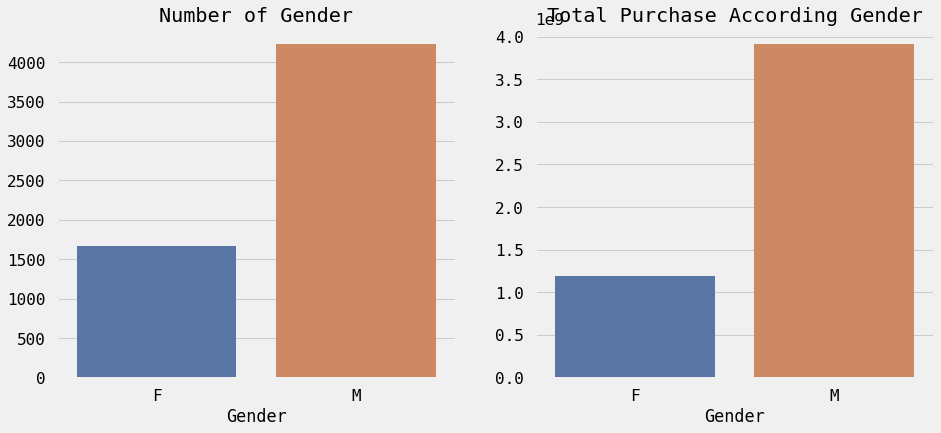

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (14,6))
sns.countplot(ax = ax[0], x= 'Gender', data= user_df, palette="deep")
sns.barplot(ax= ax[1], x = "Gender", y="Total_Purchase", data= gender_purchased, ci=None, palette="deep")
ax[0].set(title="Number of Gender", ylabel = None)
ax[1].set(title="Total Purchase According Gender", ylabel = None)
plt.show()

Relationship between City Category - Purchase amount


In [ ]:
city_purchase = user_df[["City_Category", "Total_Purchase"]]
city_purchase = city_purchase.groupby("City_Category", as_index = False).agg({'Total_Purchase': 'sum'})
print(city_purchase)

  City_Category  Total_Purchase
0             A      1316471661
1             B      2115533605
2             C      1663807476


In [ ]:
city_purchase["Number Citizen"] = 0
for city in user_df.City_Category.unique():
    city_purchase.loc[city_purchase.City_Category == city, "Number Citizen"] = len(user_df[user_df.City_Category == city])
city_purchase["Ratio Purchase/Person"] = round(city_purchase.Total_Purchase / city_purchase["Number Citizen"], 3)
print(city_purchase)

  City_Category  Total_Purchase  Number Citizen  Ratio Purchase/Person
0             A      1316471661            1045            1259781.494
1             B      2115533605            1707            1239328.415
2             C      1663807476            3139             530043.796


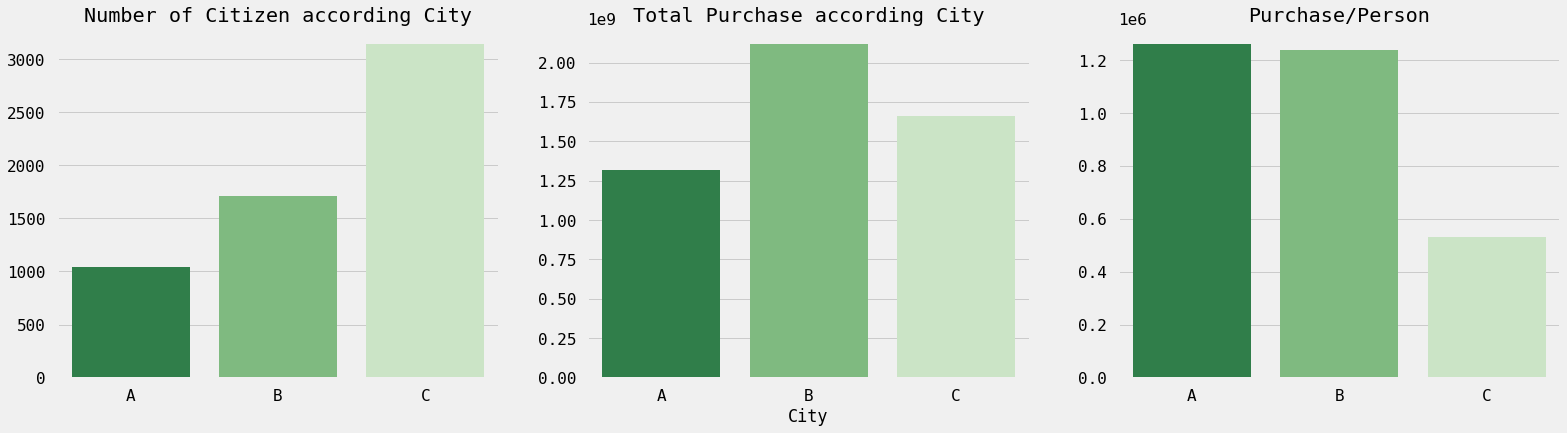

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (24,6))
sns.countplot(ax = ax[0], x= 'City_Category', data= user_df, order=["A", "B", "C"], palette='Greens_r')
sns.barplot(ax= ax[1], x = "City_Category", y="Total_Purchase", data= city_purchase, ci=None, palette='Greens_r')
sns.barplot(ax= ax[2], x = "City_Category", y="Ratio Purchase/Person", data= city_purchase, ci=None, palette='Greens_r')
ax[0].set(title="Number of Citizen according City", ylabel = None, xlabel=None)
ax[1].set(title="Total Purchase according City", ylabel = None, xlabel="City")
ax[2].set(title="Purchase/Person", xlabel=None, ylabel=None)

plt.show()

In [ ]:
ord_city = list(city_purchase.sort_values(by="Ratio Purchase/Person").City_Category)
print("Increasing order of cities according amount of purchase/person:", ord_city)

Increasing order of cities according amount of purchase/person: ['C', 'B', 'A']


Relationship between Age - Purchase amount


In [ ]:
age_purchase = user_df[["Age", "Total_Purchase"]]
age_purchase = age_purchase.groupby("Age", as_index = False).agg({'Total_Purchase': 'sum'})
age_purchase


,Age,Total_Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


In [ ]:
age_purchase["Number customer"] = 0
for age in age_purchase.Age.unique():
    age_purchase.loc[age_purchase.Age == age, "Number customer"] = len(user_df[user_df.Age == age])
age_purchase["Ratio Purchase/Person"] = round(age_purchase.Total_Purchase / age_purchase["Number customer"], 3)
age_purchase

,Age,Total_Purchase,Number customer,Ratio Purchase/Person
0,0-17,134913183,218,618867.812
1,18-25,913848675,1069,854863.120
2,26-35,2031770578,2053,989659.317
3,36-45,1026569884,1167,879665.710
4,46-50,420843403,531,792548.782
5,51-55,367099644,481,763200.923
6,55+,200767375,372,539697.245


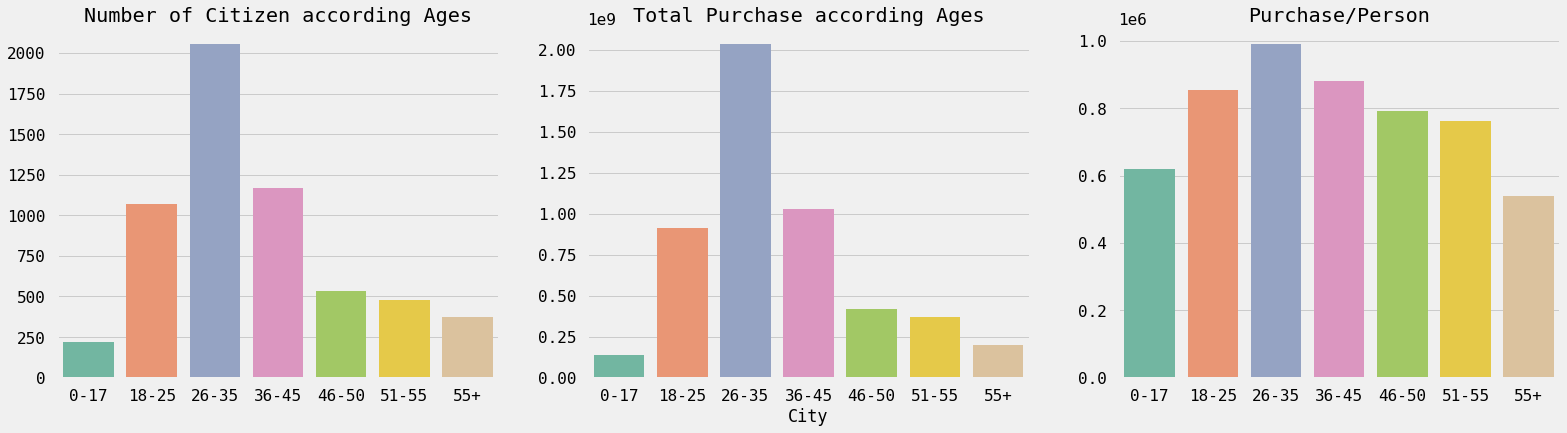

In [ ]:
age_order = list(age_purchase.Age.unique())

fig, ax = plt.subplots(1, 3, figsize = (24,6))
sns.countplot(ax = ax[0], x= 'Age', data= user_df, order = age_order, palette='Set2')
sns.barplot(ax= ax[1], x = "Age", y="Total_Purchase", data= age_purchase, ci=None, palette='Set2', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.barplot(ax= ax[2], x = "Age", y="Ratio Purchase/Person", data= age_purchase, ci=None, palette='Set2', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

ax[0].set(title="Number of Citizen according Ages", ylabel = None, xlabel=None)
ax[1].set(title="Total Purchase according Ages", ylabel = None, xlabel="City")
ax[2].set(title="Purchase/Person", xlabel=None, ylabel=None)
plt.show()

In [ ]:
# sns.barplot(x = "Age", y = "Ratio Purchase/Person", data= age_purchase)
# plt.title("Amount of money spent by each person on average according their Age.")
# plt.ylabel(None)

# plt.show()
ord_age = list(age_purchase.sort_values(by="Ratio Purchase/Person", ignore_index=True).Age)
print("Increasing order of age range according to amount of Purchase/Person: ", ord_age)

Increasing order of age range according to amount of Purchase/Person:  ['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']


Relationship between Occupation - Purchase amount


In [ ]:
job_purchase = user_df[['Occupation', 'Total_Purchase']]
job_purchase = job_purchase.groupby(by='Occupation', as_index = False).agg({'Total_Purchase': 'sum'})
job_purchase.head(6)

,Occupation,Total_Purchase
0,0,635406958
1,1,424614144
2,2,238028583
3,3,162002168
4,4,666244484
5,5,113649759


In [ ]:
job_purchase['NumberCustomer'] = 0 
for job in job_purchase.Occupation.unique():
    job_purchase.loc[job_purchase.Occupation == job, 'NumberCustomer'] = len(user_df[user_df.Occupation == job])
job_purchase['Ratio Purchase/Person'] = round(job_purchase.Total_Purchase / job_purchase["NumberCustomer"], 3)
job_purchase.head(6)

,Occupation,Total_Purchase,NumberCustomer,Ratio Purchase/Person
0,0,635406958,688,923556.625
1,1,424614144,517,821303.954
2,2,238028583,256,929799.152
3,3,162002168,170,952953.929
4,4,666244484,740,900330.384
5,5,113649759,111,1023871.703


In [ ]:
print(job_purchase.sort_values(by='Ratio Purchase/Person',ignore_index=True))
# job_purchase.Occupation = job_purchase.Occupation - 1
job_purchase
print("\nOrder of Job ID which spent most money (increasing order):")
print(list(job_purchase.sort_values(by='Ratio Purchase/Person').Occupation))

    Occupation  Total_Purchase  NumberCustomer  Ratio Purchase/Person
0           13        71919481             140             513710.579
1           10       115844465             192             603356.589
2            9        54340046              88             617500.523
3           17       393281453             491             800980.556
4           12       305449446             376             812365.548
5            1       424614144             517             821303.954
6            6       188416784             228             826389.404
7            7       557371587             669             833141.386
8           11       106751618             128             833997.016
9           15       118960211             140             849715.793
10           8        14737388              17             866905.176
11          14       259454692             294             882498.952
12           4       666244484             740             900330.384
13          18      

Relationship between Gender - Martial Status - Purchase amount


##### Product analysis
Relationship between the number of purchased product with the amount of money


In [ ]:
product_df = train_df.copy()
product_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             550068 non-null  int64  
 1   Product_ID          550068 non-null  object 
 2   Gender              550068 non-null  object 
 3   Age                 550068 non-null  object 
 4   Occupation          550068 non-null  int64  
 5   City_Category       550068 non-null  object 
 6   Years_in_city       550068 non-null  object 
 7   Marital_Status      550068 non-null  int64  
 8   Product_Category_1  550068 non-null  int64  
 9   Product_Category_2  376430 non-null  float64
 10  Product_Category_3  166821 non-null  float64
 11  Purchase            550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Analysis on sample Product "P00248942"


In [ ]:
sample = product_df[product_df.Product_ID == 'P00248942']
sample.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.810000e+02,581.000000,581.000000,581.0,581.0,581.0,581.000000
mean,1.002915e+06,8.013769,0.407917,1.0,6.0,14.0,16304.030981
std,1.800201e+03,6.419782,0.491871,0.0,0.0,0.0,3340.288874
min,1.000001e+06,0.000000,0.000000,1.0,6.0,14.0,3880.000000
25%,1.001347e+06,3.000000,0.000000,1.0,6.0,14.0,15312.000000
50%,1.002898e+06,6.000000,0.000000,1.0,6.0,14.0,15812.000000
75%,1.004514e+06,14.000000,1.000000,1.0,6.0,14.0,19264.000000
max,1.006040e+06,20.000000,1.000000,1.0,6.0,14.0,19701.000000


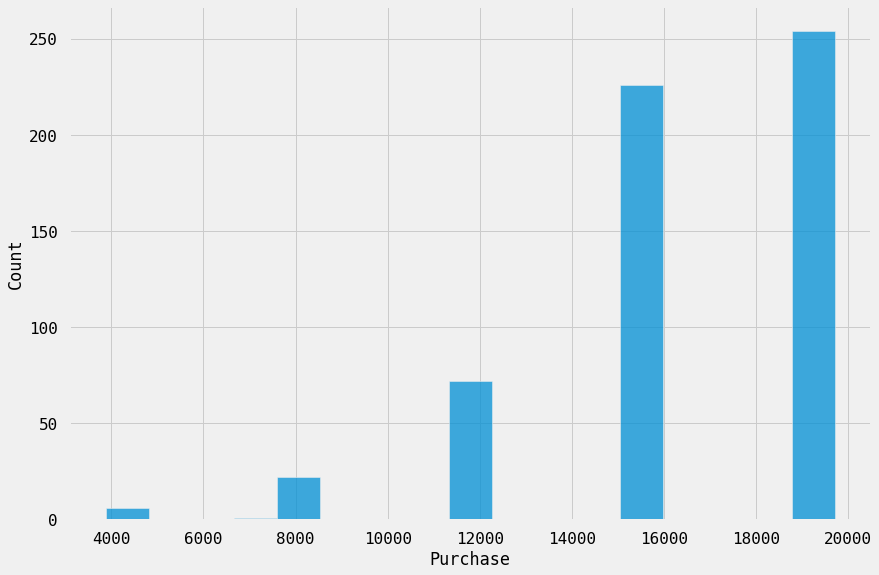

In [ ]:
sns.histplot(x="Purchase", data=sample)

In [ ]:
sample.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
126,1000024,P00248942,F,26-35,7,A,3,1,1,6.0,14.0,15774
405,1000068,P00248942,M,18-25,4,A,0,0,1,6.0,14.0,11429
516,1000093,P00248942,M,26-35,17,B,1,1,1,6.0,14.0,11754
701,1000135,P00248942,M,18-25,4,C,1,1,1,6.0,14.0,19146


In [ ]:
nb = sample[(sample.Purchase < sample.Purchase.quantile(0.25) - 1.5* (sample.Purchase.quantile(0.75) - sample.Purchase.quantile(0.25)))]
print(f"number of product P00248942 which was sold with too low price: {nb.shape[0]}")
print(f"ratio product sold with too low price / product sold: {round(100 * nb.shape[0]/ sample.shape[0], 4)}%")

number of product P00248942 which was sold with too low price: 29
ratio product sold with too low price / product sold: 4.9914%


**ASSUMPTION: Outliers exists**

###### Eliminate Outliers
Analysis on Product Category 1



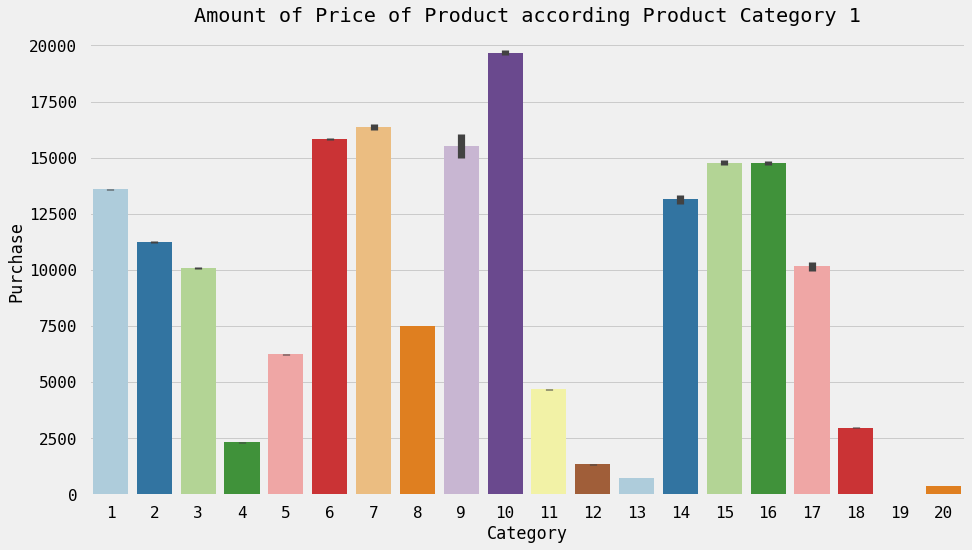

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=product_df, x="Product_Category_1", y="Purchase", palette='Paired')
plt.xlabel("Category")
plt.title("Amount of Price of Product according Product Category 1")
plt.show()

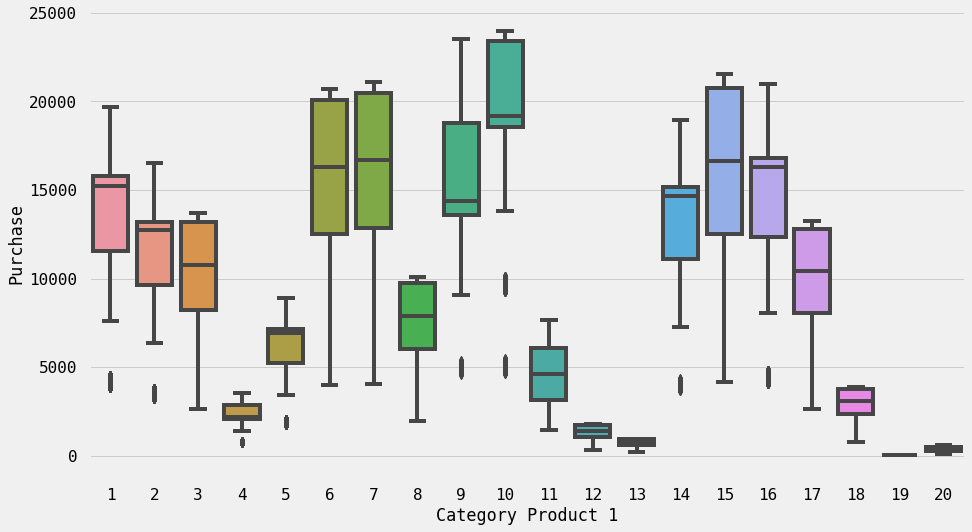

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product_Category_1', y="Purchase", data=product_df)
plt.xlabel("Category Product 1")
plt.show()

In [ ]:
rm_outlier_product_df = product_df.copy()
cate_1 = sorted(product_df.Product_Category_1.unique())
tot =  0
for i in cate_1:
    p_df = product_df[(product_df.Product_Category_1 == i)]
    print(f"Number of category product {i}:", p_df.shape[0])

    mini = p_df.Purchase.quantile(0.25) - 1.5 * (p_df.Purchase.quantile(0.75) - p_df.Purchase.quantile(0.25))
    maxi = p_df.Purchase.quantile(0.75) + 1.5 * (p_df.Purchase.quantile(0.75) - p_df.Purchase.quantile(0.25))
    p_df = p_df[(p_df.Purchase > maxi) | (p_df.Purchase < mini)]

    tot += p_df.shape[0]
    print(f"Number of category product {i} eliminated", p_df.shape[0])
    
    rm_outlier_product_df = pd.concat([rm_outlier_product_df, p_df]).drop_duplicates(keep=False)


Number of category product 1: 140378
Number of category product 1 eliminated 9018
Number of category product 2: 23864
Number of category product 2 eliminated 1533
Number of category product 3: 20213
Number of category product 3 eliminated 0
Number of category product 4: 11753
Number of category product 4 eliminated 1143
Number of category product 5: 150933
Number of category product 5 eliminated 8757
Number of category product 6: 20466
Number of category product 6 eliminated 0
Number of category product 7: 3721
Number of category product 7 eliminated 0
Number of category product 8: 113925
Number of category product 8 eliminated 0
Number of category product 9: 410
Number of category product 9 eliminated 31
Number of category product 10: 5125
Number of category product 10 eliminated 278
Number of category product 11: 24287
Number of category product 11 eliminated 0
Number of category product 12: 3947
Number of category product 12 eliminated 0
Number of category product 13: 5549
Number of

In [ ]:
product_df.shape

(550068, 12)

In [ ]:
rm_outlier_product_df.shape

(528732, 12)

In [ ]:
print(f"Total number of rows in product table: {product_df.shape[0]}")
print(f"Total number of rows have been eliminated: {tot}")
print(f"Percentage of number of rows have been eliminated: {round(100 * tot/product_df.shape[0], 2)}%")


Total number of rows in product table: 550068
Total number of rows have been eliminated: 21336
Percentage of number of rows have been eliminated: 3.88%


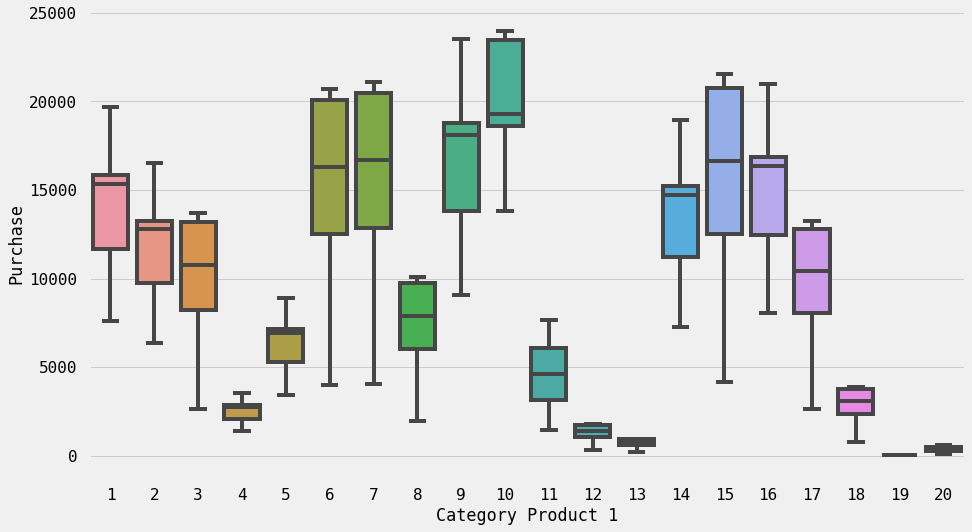

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product_Category_1', y="Purchase", data=rm_outlier_product_df)
plt.xlabel("Category Product 1")
plt.show()

In [ ]:
def q50(x):
    return x.quantile(0.5)

In [ ]:
ord_1_cate_1 = product_df.groupby(by="Product_Category_1").agg({'Purchase':q50}).sort_values(by='Purchase').index
ord_2_cate_1 = product_df.groupby(by="Product_Category_1").agg({'Purchase':'mean'}).sort_values(by='Purchase').index
ord_cate_2 = product_df.groupby(by="Product_Category_2").agg({'Purchase':'mean'}).sort_values(by='Purchase').index 
ord_cate_3 = product_df.groupby(by="Product_Category_3").agg({'Purchase':'mean'}).sort_values(by='Purchase').index
print("ordered list of category according Mode Purchase amount:", list(ord_1_cate_1))
print("ordered list of category according Mean Purchase amount:", list(ord_cate_2))
print("ordered list of category according Mean Purchase amount:", list(ord_cate_3))

ordered list of category according Mode Purchase amount: [19, 20, 13, 12, 4, 18, 11, 5, 8, 17, 3, 2, 9, 14, 1, 16, 6, 15, 7, 10]
ordered list of category according Mean Purchase amount: [7.0, 12.0, 14.0, 9.0, 11.0, 5.0, 18.0, 17.0, 13.0, 4.0, 8.0, 16.0, 15.0, 3.0, 6.0, 2.0, 10.0]
ordered list of category according Mean Purchase amount: [12.0, 4.0, 14.0, 9.0, 18.0, 17.0, 16.0, 11.0, 5.0, 15.0, 8.0, 13.0, 6.0, 10.0, 3.0]


#### Product ID

In [ ]:
### HANDLE NEW PRODUCT 
import math
def handle_new_product(new_products: list,train_df: pd.DataFrame):
    '''
    new_products: new product which has new Product_ID that have not appeared in train_df dataframe.
    train_df: dataframe which already encodes known Product_ID from categorical datatype to integer (or number).

    '''
    transform_dict = dict()
    df = train_df.copy()

    df = df[~df.Product_ID.isin(new_products)]
    similar = df.copy()
    for product in new_products: 
        c1, c2, c3 = list(df[df.Product_ID == product].iloc[0, [8,9,10]])
        if math.isnan(c1):
            print('Empty information product')
        # if not math.isnan(c1):
        similar = df[df.Product_Category_1 == c1]
        if not math.isnan(c2):
            similar = similar[similar.Prodcut_Category_2 == c2]
        if not math.isnan(c3):
            similar = similar[similar.Prodcut_Category_3 == c3]
        if similar.shape[0] != 0:
            label = math.average(list(similar.Product_ID.unique()))
            transform_dict[product] = round()
    train_df['Product_ID'].replace(transform_dict, inplace=True)

In [ ]:
product_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
ord_pid = product_df.groupby(by="Product_ID").agg({'Purchase':'mean'}).sort_values(by='Purchase').index
ord_pid

Index(['P00370293', 'P00370853', 'P00371644', 'P00375436', 'P00372445',
       'P00091742', 'P00041442', 'P00293442', 'P00063242', 'P00273842',
       ...
       'P00087042', 'P00052842', 'P00341542', 'P00074542', 'P00117642',
       'P00119342', 'P00116142', 'P00200642', 'P00085342', 'P00086242'],
      dtype='object', name='Product_ID', length=3631)

#### Processing

In [ ]:
learn_df = train_df.copy()
learn_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
learn_df['Efficiency'] = 3 - learn_df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
learn_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Efficiency
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1


.........

## One Run For Data Preparation [1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


train_raw = pd.read_csv(TRAIN_DATA_PATH)
test_raw = pd.read_csv(TEST_DATA_PATH)

df_train = train_raw.copy()
df_test = test_raw.copy()

df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mean(), inplace=True)
df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean(), inplace=True)
df_train['Product_Category_3'].fillna(df_train['Product_Category_3'].mode()[0], inplace= True)
df_test['Product_Category_3'].fillna(df_test['Product_Category_3'].mode()[0],inplace=True)
df_train['Product_Category_1']=np.sqrt(df_train['Product_Category_1'])
df_test['Product_Category_1'] = np.sqrt(df_test['Product_Category_1'])


le = LabelEncoder()
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])
df_test['Product_ID'] = le.fit_transform(df_test['Product_ID'])


columns = []
for col in df_train.columns:
  if df_train[col].dtypes == 'object':
      columns.append(col)


train_encode = pd.get_dummies(df_train,columns = columns, dtype = np.uint8, drop_first=True)
test_encode = pd.get_dummies(df_test, columns = columns, dtype = np.uint8, drop_first = True)

X = train_encode.drop(['Purchase'], axis= 1)
y = train_encode['Purchase']

col_train = X.columns
ind_train = X.index
col_test = test_encode.columns
ind_test = test_encode.index

scl = StandardScaler()
X = scl.fit_transform(X)
test_encode = scl.fit_transform(test_encode)


X = pd.DataFrame(X, columns = col_train, index = ind_train)

test_encode = pd.DataFrame(test_encode, columns = col_test, index= ind_test)


## One Run For Data Preparation After Reading HongDuc Version ...

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
scl = StandardScaler()


train_raw = pd.read_csv(TRAIN_DATA_PATH)
test_raw = pd.read_csv(TEST_DATA_PATH)

df_train = train_raw.copy()
df_test = test_raw.copy()

df_train.drop('Product_Category_2', axis=1, inplace=True)
df_train.drop('Product_Category_3', axis=1, inplace=True)
df_test.drop('Product_Category_2', axis=1, inplace=True)
df_test.drop('Product_Category_3', axis=1, inplace=True)


df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])
df_test['Product_ID'] = le.fit_transform(df_test['Product_ID'])

df_train['Product_Category_1'] = le.fit([19, 20, 13, 12, 4, 18, 11, 5, 8, 17, 3, 2, 9, 14, 1, 16, 6, 15, 7, 10]).transform(df_train['Product_Category_1'])
df_test['Product_Category_1'] = le.transform(df_test['Product_Category_1'])

df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])
df_test['Product_ID'] = le.fit_transform(df_test['Product_ID'])
df_train['User_ID']  = le.fit_transform(df_train['User_ID'])
df_test['User_ID']  = le.fit_transform(df_test['User_ID'])


columns = ['Gender', 'Age', 'City_Category' , 'Stay_In_Current_City_Years' ] ## Occupation maybe
train_encode = pd.get_dummies(df_train,columns = columns, dtype = np.uint8, drop_first=True)
test_encode = pd.get_dummies(df_test, columns = columns, dtype = np.uint8, drop_first = True)

standarded_columns = ['User_ID', 'Product_ID', 'Occupation',]
train_encode[standarded_columns] = scl.fit_transform(train_encode[standarded_columns])

test_encode[standarded_columns] = scl.fit_transform(test_encode[standarded_columns])




X = train_encode.drop(['Purchase'], axis= 1)
y = train_encode['Purchase']

col_train = X.columns
ind_train = X.index
col_test = test_encode.columns
ind_test = test_encode.index


X = pd.DataFrame(X, columns = col_train, index = ind_train)

test_encode = pd.DataFrame(test_encode, columns = col_test, index= ind_test)


In [ ]:
X.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.749661,-1.022993,0.294864,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.749661,0.660469,0.294864,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.749661,-0.845162,0.294864,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.749661,-0.868873,0.294864,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.749068,1.014154,1.214734,0,7,1,0,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

## Setting Up One Time For Modelling and Evaluation
* Evaluation Function
* Constraint
* Plot Funtion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
import time

RANDOM_STATE = 7777
TEST_SIZE = 0.3

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)
## LEAKING !!!!!!

def myRMSE(y_pred, y_real):
  return np.sqrt(mean_squared_error(y_real, y_pred))

RMSE_score = make_scorer(myRMSE, greater_is_better=False)

def plot_validation_curve(train_scores, valid_scores, para_name, param_range):
  fig, ax = plt.subplots(figsize= (7, 7))
  ax.plot(param_range, train_scores.mean(axis = 1), label = 'train_scores')
  ax.plot(param_range, valid_scores.mean(axis = 1), label = 'valid_scores')
  ax.set_xlabel(para_name)
  ax.set_ylabel("-RMSE")
  ax.set_title("Validation Curve on " + para_name )
  ax.set_xticks(param_range)
  ax.legend()
  plt.show()

def plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve"):
  fig, ax = plt.subplots(figsize = (7, 7))
  ax.plot(train_sizes, train_scores.mean(axis = 1), label= 'train_scores')
  ax.plot(train_sizes, valid_scores.mean(axis = 1), label = 'valid_scores')
  ax.set_xlabel('Number of Examples')
  ax.set_ylabel("-RMSE")
  ax.set_title(title)
  ax.set_xticks(train_sizes)
  ax.legend()
  plt.show()

def to_submission_file(model):
  model.fit(X, y)
  y_test_pred = model.predict(test_encode)
  submission = pd.concat([pd.DataFrame(y_test_pred, columns=['Purchase']), test_raw[['User_ID', 'Product_ID']]] , axis = 1)
  submission.to_csv('submission.csv', index=False)


class EvaluationTimer():
  def __init__(self):
    self.now = time.time()

  def start(self):
    self.now = time.time() 

  def tick(self , title = 'Your time'):
     result = time.time() - self.now
     print(title + f" : {result:.5f} seconds")
  

timer = EvaluationTimer()

## Modelling and Evaluation

 **Now we have:** \\
 `X` : Features of Training Data \\
 `y` : Target Variable of Training Data \\
 `test_encode`: Testing Data after Preprocessing

### Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error
def myRMSE(y_pred, y_real):
  return np.sqrt(mean_squared_error(y_real, y_pred))

### Models

In [ ]:
RANDOM_STATE = 7777
TEST_SIZE = 0.33

#### [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve

##### Ordinary Least Squares

In [ ]:
olsModel = LinearRegression()

In [ ]:
timer.start()
olsModel.fit(X_train, y_train)
timer.tick("Your training time")

Your training time : 0.32719 seconds


In [ ]:
y_train_result = olsModel.predict(X_train)

In [ ]:
y_train_result[:5], y_train_result.shape

(array([ 9854.64578686, 10600.82500185,  9183.92166734,  9737.69193821,
         8213.97889379]), (385047,))

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))


RMSE of the training set: 4681.408039230237


In [ ]:
timer.start()
y_val_result = olsModel.predict(X_val)
timer.tick("Your prediction time")

Your prediction time : 0.05646 seconds


In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 4672.748587492956


In [ ]:
## Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(olsModel, X_train, y_train, train_sizes=[500, 5000, 50000, 150000, 250000, 300000], scoring = RMSE_score)

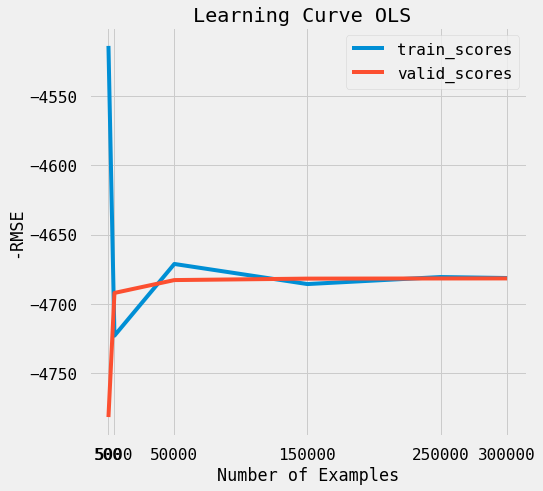

In [ ]:
plot_learning_curve(train_sizes, train_scores, valid_scores, title= "Learning Curve OLS ")

*Underfit ... maybe*

OLS: RMSE on Test set:  `4540.31704630562`

*Complexity Explaination and Non-Negative Least Squares  [Link](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)*

##### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve, learning_curve

In [ ]:
tuned_parameters = [{'alpha': [10e-4, 10e-3, 10e-2, 10e-1, 0 , 1 , 10, 100]}]

In [ ]:
train_scores, val_scores = validation_curve(Ridge(), X_train, y_train, param_name ='alpha', param_range=tuned_parameters[0]['alpha'], scoring = RMSE_score)

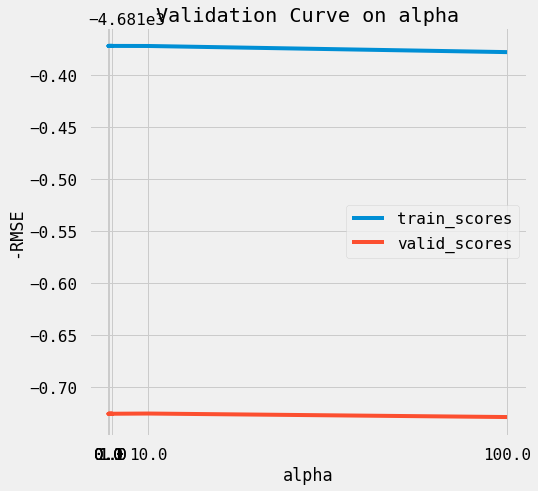

In [ ]:
plot_validation_curve(train_scores, val_scores, 'alpha', tuned_parameters[0]['alpha'])

In [ ]:
ridgeModel = Ridge(alpha = 1)

In [ ]:
timer.start()
ridgeModel.fit(X_train, y_train)
timer.tick("Your training time")

Your training time : 0.07267 seconds


In [ ]:
y_train_result = ridgeModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))


RMSE of the training set: 4681.408039670588


In [ ]:
timer.start()
y_val_result = ridgeModel.predict(X_val)
timer.tick("Your prediction time")

Your prediction time : 0.01387 seconds


In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 4672.748499155186


In [ ]:
## Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(ridgeModel, X_train, y_train, train_sizes=[500, 5000, 50000, 150000, 250000, 300000], scoring = RMSE_score)

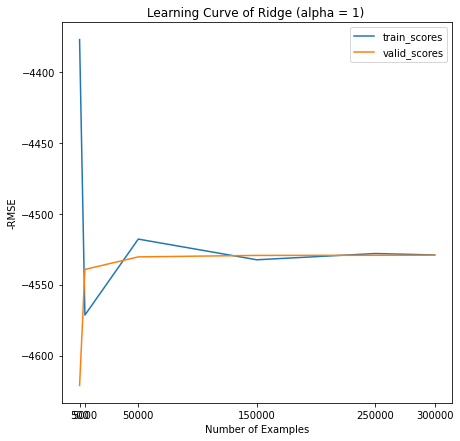

In [ ]:
plot_learning_curve(train_sizes, train_scores, valid_scores, title= "Learning Curve of Ridge (alpha = 1) ")

*Note:*
* How ??
* Underfit .....
* What is different than OLS

##### LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_y = StandardScaler()
y_train_now = sc_y.fit_transform(y_train.values.reshape(-1,1))

In [ ]:
tuned_parameters = [{'alpha': [10e-4, 10e-3, 10e-2, 10e-1, 0 , 1 , 10, 100]}]

In [ ]:
train_scores, val_scores = validation_curve(Lasso(), X_train, y_train_now, param_name ='alpha', param_range=tuned_parameters[0]['alpha'], scoring = RMSE_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+05, tolerance: 3.080e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

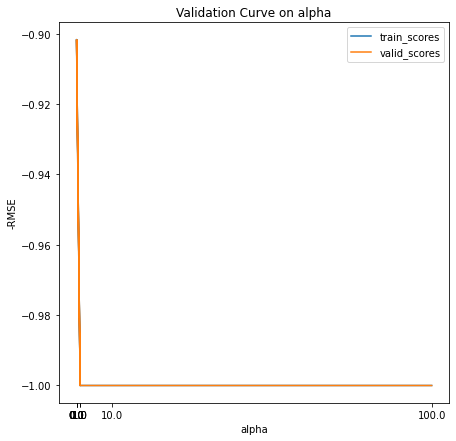

In [ ]:
plot_validation_curve(train_scores, val_scores, 'alpha', tuned_parameters[0]['alpha'])

*Note*
* Spare Solution
* Complexity

#### Decision Tree & Random Forest

##### [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, validation_curve,learning_curve

In [ ]:
tuned_parameters = [
      {'max_depth' : [1, 5, 10, 11,  12, 15, 50, 100],
       'min_samples_leaf' : [1, 3, 5, 10 , 15]}]

In [ ]:
dsCLF = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, scoring = RMSE_score)
dsCLF.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 5, 10, 11, 12, 15, 50, 100],
                          'min_samples_leaf': [1, 3, 5, 10, 15]}],
             scoring=make_scorer(myRMSE, greater_is_better=False))

In [ ]:
dsCLF.best_params_

{'max_depth': 15, 'min_samples_leaf': 15}

In [ ]:
dsCLF.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_leaf=15)

In [ ]:
pd.DataFrame.from_dict(dsCLF.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.160621,0.005050,0.006836,0.000581,1,1,"{'max_depth': 1, 'min_samples_leaf': 1}",-4285.219751,-4294.232619,-4301.051499,-4295.229538,-4290.290436,-4293.204769,5.272214,36
1,0.163198,0.003580,0.006445,0.000033,1,3,"{'max_depth': 1, 'min_samples_leaf': 3}",-4285.219751,-4294.232619,-4301.051499,-4295.229538,-4290.290436,-4293.204769,5.272214,36
2,0.166121,0.003677,0.006662,0.000138,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",-4285.219751,-4294.232619,-4301.051499,-4295.229538,-4290.290436,-4293.204769,5.272214,36
3,0.161461,0.001799,0.006701,0.000044,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",-4285.219751,-4294.232619,-4301.051499,-4295.229538,-4290.290436,-4293.204769,5.272214,36
4,0.162213,0.003640,0.006624,0.000059,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",-4285.219751,-4294.232619,-4301.051499,-4295.229538,-4290.290436,-4293.204769,5.272214,36
5,0.637310,0.010185,0.008825,0.000128,5,1,"{'max_depth': 5, 'min_samples_leaf': 1}",-3216.972560,-3205.735966,-3204.099333,-3227.761193,-3204.050992,-3211.724009,9.355278,27
6,0.636403,0.016186,0.009069,0.000467,5,3,"{'max_depth': 5, 'min_samples_leaf': 3}",-3216.972560,-3205.735966,-3204.099333,-3227.761193,-3204.050992,-3211.724009,9.355278,27
7,1.097786,0.259520,0.014239,0.004015,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",-3216.972560,-3205.735966,-3204.099333,-3227.761193,-3204.050992,-3211.724009,9.355278,27
8,1.150854,0.039076,0.021010,0.007758,5,10,"{'max_depth': 5, 'min_samples_leaf': 10}",-3216.972560,-3205.735966,-3204.099333,-3227.761193,-3204.050992,-3211.724009,9.355278,27
9,1.355083,0.783509,0.015496,0.009114,5,15,"{'max_depth': 5, 'min_samples_leaf': 15}",-3216.972560,-3205.735966,-3204.099333,-3227.761193,-3204.050992,-3211.724009,9.355278,27


In [ ]:
train_scores, valid_scores = validation_curve(DecisionTreeRegressor(max_depth=15), X_train, y_train, param_name = "min_samples_leaf", param_range = tuned_parameters[0]['min_samples_leaf'], scoring = RMSE_score)

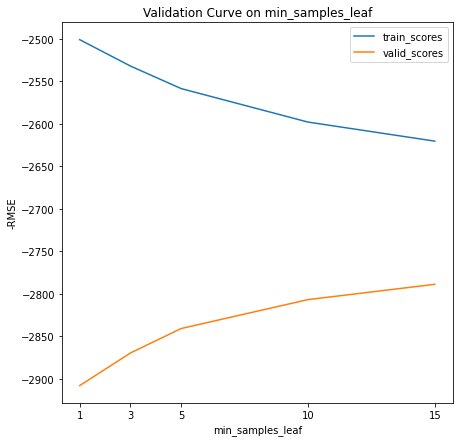

In [ ]:
plot_validation_curve(train_scores, valid_scores, "min_samples_leaf", tuned_parameters[0]['min_samples_leaf'])

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(dsCLF.best_estimator_, X_train, y_train, train_sizes=[500, 5000, 50000, 150000, 250000, 300000], scoring = RMSE_score)

In [ ]:
train_sizes, train_scores, valid_scores

(array([   500,   5000,  50000, 150000, 250000, 300000]),
 array([[-3092.76311419, -3189.31913424, -3189.31913424, -3189.31913424,
         -3189.31913424],
        [-2651.23640436, -2619.72071924, -2619.72071924, -2619.72071924,
         -2619.72071924],
        [-2604.8941571 , -2600.36534634, -2600.36534634, -2600.36534634,
         -2600.36534634],
        [-2609.31104944, -2604.57065052, -2600.73125772, -2600.73125772,
         -2600.73125772],
        [-2614.61325136, -2618.77970674, -2617.78580778, -2617.88110496,
         -2616.07756198],
        [-2611.95996891, -2622.9849416 , -2623.50527299, -2621.65197618,
         -2622.7535024 ]]),
 array([[-3955.4956191 , -3884.02543502, -3888.17125447, -3917.16578801,
         -3875.65357635],
        [-3190.85259603, -3181.52717732, -3204.50258056, -3212.80021958,
         -3196.76017489],
        [-2916.32637403, -2899.79978054, -2904.36802191, -2915.29965444,
         -2904.7130499 ],
        [-2821.20158256, -2817.41159762, -2837.17

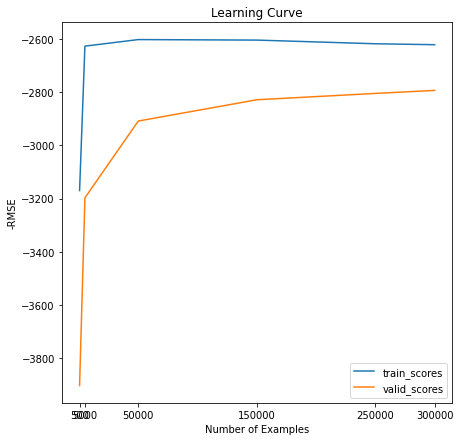

In [ ]:
plot_learning_curve(train_sizes, train_scores, valid_scores)

In [ ]:
dtrModel = dsCLF.best_estimator_

dtrModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=15)

In [ ]:
y_train_result = dtrModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

RMSE of the training set: 2615.0117678495753


In [ ]:
y_val_result = dtrModel.predict(X_val)

In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 2787.7190447210533


In [ ]:
to_submission_file(dtrModel)

RMSE on Test set after Tuning 3 times: `2985.89596531204`

*Note*
* [Tips on practical use](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

##### [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

###### Not Tuning Version

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfModel = RandomForestRegressor(n_jobs = -1, random_state=RANDOM_STATE)

In [ ]:
timer.start()
rfModel.fit(X_train, y_train)
timer.tick("Training")

Training : 195.98094 seconds


In [ ]:
y_train_result = rfModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

RMSE of the training set: 1028.3526806338914


In [ ]:
timer.start()
y_val_result = rfModel.predict(X_val)
timer.tick("Prediction Time")

Prediction Time : 7.43367 seconds


In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 2755.394039039411


In [ ]:
X_train.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


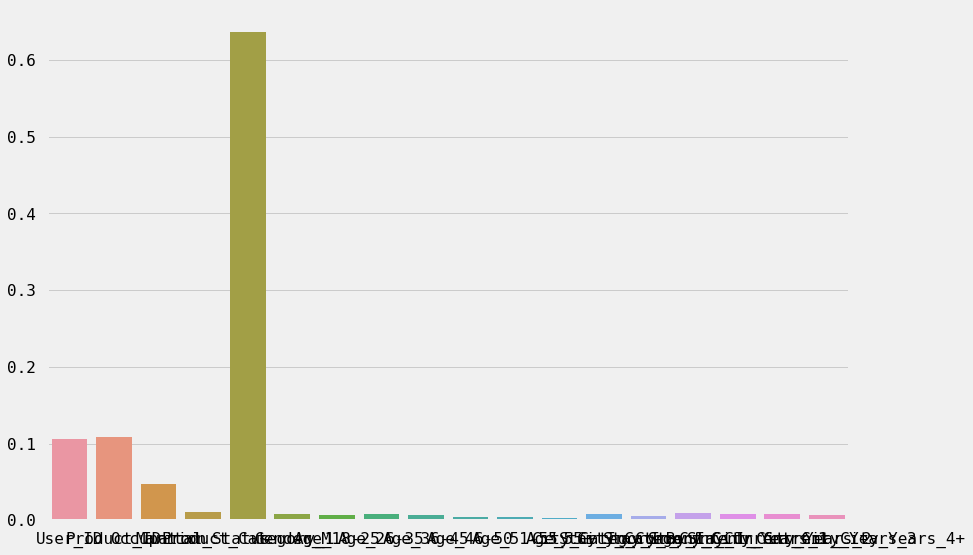

In [ ]:
sns.barplot(X_train.columns, rfModel.feature_importances_)

In [ ]:
to_submission_file(rfModel)

RMSE on Test set: `3051.29562235462	`

###### Tuning Version (....)

*Note*
* Trade-off between Bias and Variance in RF
* Tuning HyperParameters

#### KNN (...)

Really? Is it crash ? ( The complexity of Predition is high as there is a large of data points)

#### [NLP](https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33)


I don't think it's a good idea as we can determine the form of the function. (We can feature engineering as it's not like images, audios)

#### [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html)

Similar reasons as KNN in Training Complexity

#### Probabilistic Models (...)
We should test more ....

##### [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
 (Crash as the result from large number of data points)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnbModel = GaussianNB()

In [ ]:
gnbModel.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train_result = gnbModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

In [ ]:
y_val_result = gnbModel.predict(X_val)

In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

#### Other **Models**

##### XGBoost (From [1])

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
xgbModel = XGBRegressor(random_state = 7777, n_estimator =61 , max_depth = 11)

In [ ]:
xgbModel.fit(X_train, y_train)

[04:10:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=11, n_estimator=61, random_state=7777)

In [ ]:
y_train_result = xgbModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

RMSE of the training set: 2307.289714112472


In [ ]:
y_val_result = xgbModel.predict(X_val)

In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 2578.032138332575


RMSE on Test set: `2843.87284380426`

*Note*
* Already tuning ...

## Submission

or use `to_submission_file` function

### Predict on the testing set

In [ ]:
## Note: Change model name

y_test_pred = dtrModel.predict(test_encode)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_test_pred.shape , y_test_pred

((233599,), array([19536.98305085,   666.28869969, 17013.75      , ...,
        20727.04861111,   376.81651376, 17013.75      ]))

In [ ]:
submission = pd.concat([pd.DataFrame(y_test_pred, columns=['Purchase']), df_test[['User_ID', 'Product_ID']]] , axis = 1)
submission.head()

,Purchase,User_ID,Product_ID
0,19536.983051,1000004,1144
1,666.288700,1000009,994
2,17013.750000,1000010,2672
3,17013.750000,1000010,1299
4,20488.181818,1000011,519


In [ ]:
submission.to_csv('submission.csv', index=False)